In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

import numpy as np
# From https://databank.worldbank.org/indicator/NY.GDP.PCAP.CD/1ff4a498/Popular-Indicators#
df = pd.read_csv("e60bf612-2fff-4daf-b863-cb65bb1b5748_Data.csv")

In [2]:
df["Series Name"].unique()

array(['Population, total', 'Population growth (annual %)',
       'Surface area (sq. km)',
       'Poverty headcount ratio at national poverty lines (% of population)',
       'GNI, Atlas method (current US$)',
       'GNI per capita, Atlas method (current US$)',
       'GNI, PPP (current international $)',
       'GNI per capita, PPP (current international $)',
       'Income share held by lowest 20%',
       'Life expectancy at birth, total (years)',
       'Fertility rate, total (births per woman)',
       'Adolescent fertility rate (births per 1,000 women ages 15-19)',
       'Contraceptive prevalence, any methods (% of women ages 15-49)',
       'Births attended by skilled health staff (% of total)',
       'Mortality rate, under-5 (per 1,000 live births)',
       'Prevalence of underweight, weight for age (% of children under 5)',
       'Immunization, measles (% of children ages 12-23 months)',
       'Primary completion rate, total (% of relevant age group)',
       'School en

In [3]:
dfGDP = df[df["Series Name"]=='GDP per capita (current US$)']
dfGDP.replace("..",np.NaN,inplace=True)
dfPop = df[df["Series Name"]=='Population, total']
dfPop.replace("..",np.NaN,inplace=True)


In [4]:
from re import search

dfGDP["lastGDP"] = dfGDP['2020 [YR2020]']
dfPop["lastPop"] = dfPop['2020 [YR2020]']


yearcols = [x for x in dfGDP.columns if search("YR", x)]
for x in reversed(yearcols):
    dfGDP["lastGDP"].fillna(dfGDP[x],inplace=True)
    dfPop["lastPop"].fillna(dfPop[x],inplace=True)

In [5]:
dfPop2 = dfPop[["Country Code","lastPop"]]
dfGDP2 = dfGDP[["Country Code","lastGDP"]]

In [6]:
dfPop2.shape,dfGDP2.shape
dfPopGDP = dfPop2.merge(dfGDP2)

In [7]:
dfvac = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")
dfvac.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [8]:
xx = dfvac[['iso_code','date','continent','location', 'people_fully_vaccinated']]


In [9]:
dfvac.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [10]:
dffinal = xx.merge(dfPopGDP,left_on="iso_code",right_on="Country Code",how="left")
dffinal.drop("Country Code", inplace=True,axis=1)
dffinal.head()

,iso_code,date,continent,location,people_fully_vaccinated,lastPop,lastGDP
0,AFG,2020-02-24,Asia,Afghanistan,NaN,38041754,507.103431871987
1,AFG,2020-02-25,Asia,Afghanistan,NaN,38041754,507.103431871987
2,AFG,2020-02-26,Asia,Afghanistan,NaN,38041754,507.103431871987
3,AFG,2020-02-27,Asia,Afghanistan,NaN,38041754,507.103431871987
4,AFG,2020-02-28,Asia,Afghanistan,NaN,38041754,507.103431871987


In [11]:
dffinal.fillna(0,inplace=True)
dffinal["percentVac"] = (dffinal["people_fully_vaccinated"]/dffinal["lastPop"].astype(int)).fillna(0)


In [12]:
#dffinal2 = dffinal[dffinal.percentVac>0]
dffinal2 = dffinal
dffinal2[dffinal2.iso_code=="ESP"].tail(100)

,iso_code,date,continent,location,people_fully_vaccinated,lastPop,lastGDP,percentVac
72753,ESP,2021-01-23,Europe,Spain,0.0,47076781,29600.3782526602,0.000000
72754,ESP,2021-01-24,Europe,Spain,88698.0,47076781,29600.3782526602,0.001884
72755,ESP,2021-01-25,Europe,Spain,123697.0,47076781,29600.3782526602,0.002628
72756,ESP,2021-01-26,Europe,Spain,173066.0,47076781,29600.3782526602,0.003676
72757,ESP,2021-01-27,Europe,Spain,192759.0,47076781,29600.3782526602,0.004095
...,...,...,...,...,...,...,...,...
72848,ESP,2021-04-28,Europe,Spain,4413784.0,47076781,29600.3782526602,0.093757
72849,ESP,2021-04-29,Europe,Spain,4689766.0,47076781,29600.3782526602,0.099620
72850,ESP,2021-04-30,Europe,Spain,0.0,47076781,29600.3782526602,0.000000
72851,ESP,2021-05-01,Europe,Spain,0.0,47076781,29600.3782526602,0.000000


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='date', ylabel='percentVac'>

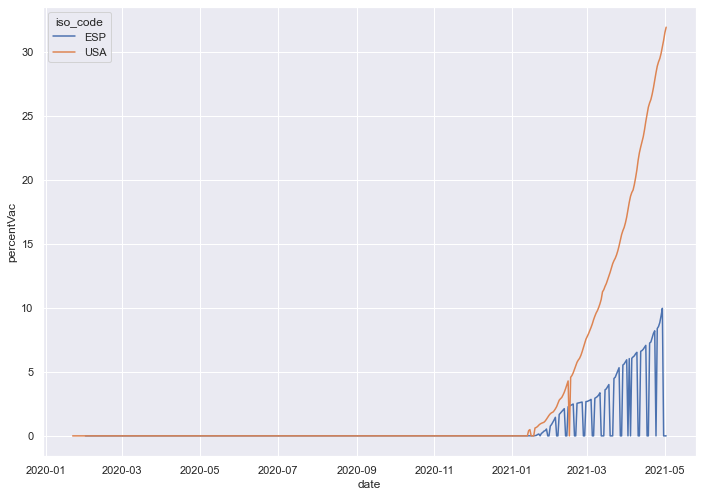

In [13]:
import seaborn as sns
samplecountries = ["USA","ESP"]
aux = dffinal2[dffinal2.iso_code.isin(samplecountries)]
aux.date = pd.to_datetime(aux.date)
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.lineplot(aux.date,100*aux.percentVac,hue=aux.iso_code)

In [14]:
dffinal2 = dffinal2[dffinal2.people_fully_vaccinated>0]

In [15]:
aux2 = dffinal2.groupby("iso_code").agg('last')
aux2 = aux2[aux2.lastGDP!=0]
aux2.lastGDP = pd.to_numeric(aux2.lastGDP)
aux2.head()

,date,continent,location,people_fully_vaccinated,lastPop,lastGDP,percentVac
iso_code,,,,,,,
ABW,2021-04-30,North America,Aruba,22559.0,106314,29007.693003,0.212192
ALB,2021-02-22,Europe,Albania,655.0,2854191,5353.244856,0.000229
AND,2021-04-19,Europe,Andorra,4681.0,77142,40886.391165,0.060680
ARE,2021-04-20,Asia,United Arab Emirates,3836521.0,9770529,43103.323058,0.392663
ARG,2021-05-02,South America,Argentina,972410.0,44938712,9912.281809,0.021639


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


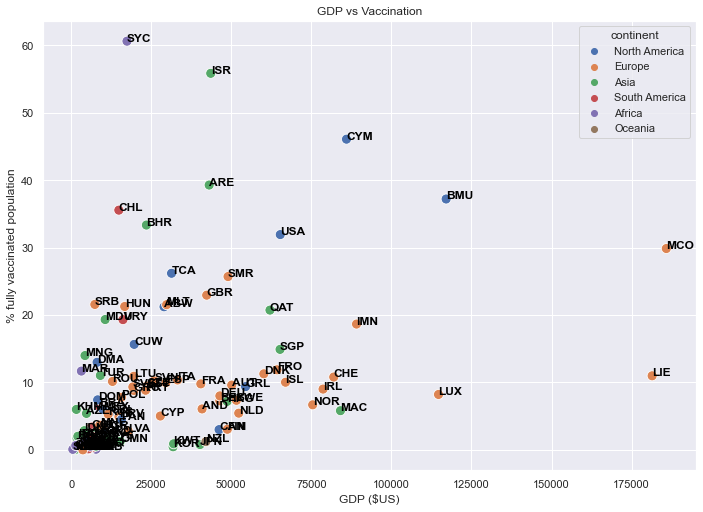

In [16]:
import matplotlib.pyplot as plt
sns.scatterplot(aux2.lastGDP.astype(float),100*aux2.percentVac,hue=aux2.continent,s=100)
plt.xlabel("GDP ($US)")
plt.ylabel("% fully vaccinated population")
plt.title("GDP vs Vaccination")
# add annotations one by one with a loop
for line in range(0,aux2.shape[0]):
        plt.text(aux2.lastGDP[line]+0.2, 100*aux2.percentVac[line], aux2.index[line], horizontalalignment='left', size='medium', color='black', weight='semibold')


In [29]:
import matplotlib.pyplot as plt
sns.set_style("white")
def plotbyContinent(df,continent="all",filter=True):
    
    if filter: df = df[df.percentVac>0]
    fig, ax = plt.subplots(figsize=(12,8))
    if continent != "all":
        df2 = df[df.continent==continent]
        sns.scatterplot(df2.lastGDP,100*df2.percentVac,ax=ax,s=100)
        plt.title("GDP vs Vaccination in " + continent, fontsize=18)
    else:
        df2 = df
        sns.scatterplot(df2.lastGDP,100*df2.percentVac,hue=df2.continent,ax=ax, s=100)
        plt.title("GDP vs Vaccination worldwide", fontsize=18)
    plt.xlabel("GDP ($US)",fontsize=14)
    plt.ylabel("% fully vaccinated population",fontsize=14)
    
    # add annotations one by one with a loop
    for line in range(0,df2.shape[0]):
            plt.text(df2.lastGDP[line]+10, 100*df2.percentVac[line], df2.index[line], horizontalalignment='left', size='small', color='black', weight='semibold')
    fig.savefig("GDP_"+continent+str(today)+".png")

In [26]:
continents = aux2.continent.unique()
continents

array(['North America', 'Europe', 'Asia', 'South America', 'Africa',
       'Oceania'], dtype=object)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


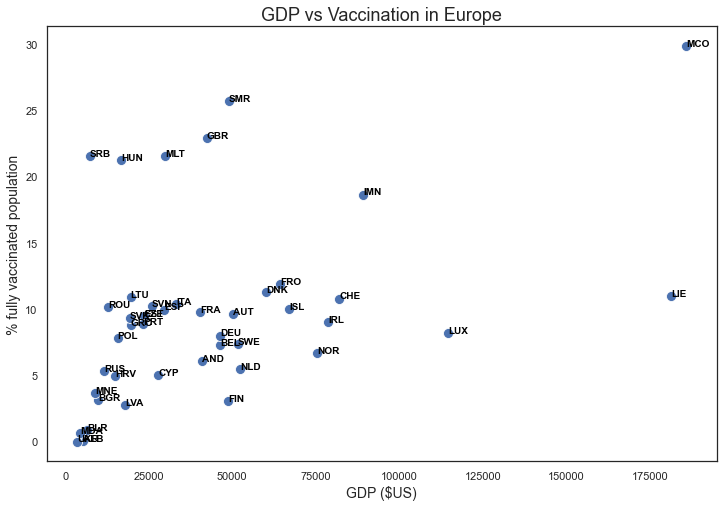

In [30]:
plotbyContinent(aux2,"Europe")

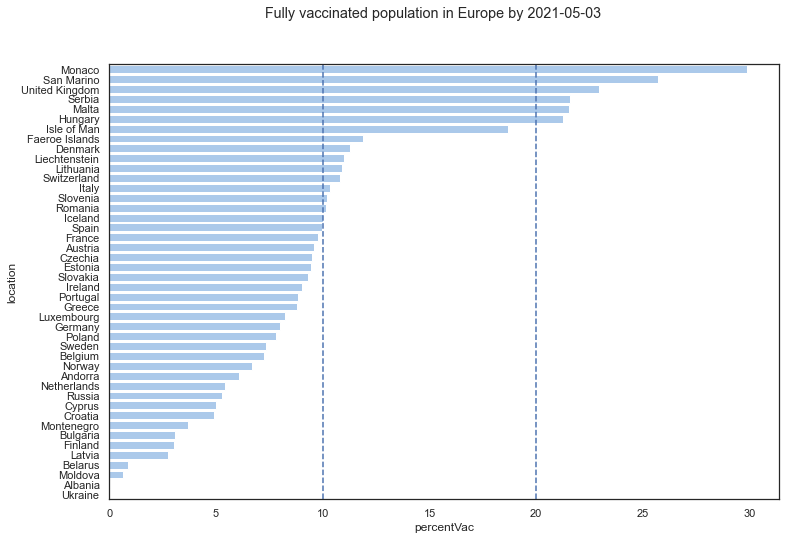

In [24]:
from datetime import date

today = date.today()

continent = "Europe"

f, ax = plt.subplots(figsize=(12, 8))
f.suptitle("Fully vaccinated population in "+continent + " by " + str(today))
df2 = aux2[aux2.continent==continent]
df2 = df2[df2.percentVac>0.0]
#df2 = aux2
df2 = df2.sort_values("percentVac", ascending=False)
df2 = df2[df2.percentVac>0.00]
# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x=100*df2.percentVac, y=df2.location, data=df2,
            label="percentVac", color="b")
for i in range(int(100*max(df2.percentVac))):
    if (i%10 == 0):
        plt.axvline(i, ls="--")
f.savefig(continent+str(today)+".png")

In [ ]:
aux2.head()
